In [9]:
# Import all the necessary packages

import numpy as np
import pandas as pd
import scipy
import uci_dataset as data
import random
random.seed(10)
import pickle

# The results will depend on the random train-test split, so we average the accuracies over a certain number of repetitions
n_rep = 4

import wittgenstein3 as lw
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [2]:
# Import the dictionary with the datasets we want to consider when experimenting
with open('datasets_classlabels.pkl', 'rb') as fp:
    DFs = pickle.load(fp)

In [3]:
# Dictionary of accuracies of standard RIPPERk on all datasets

stand_acc = {'Thyroid': 0.946, 'audiology': 0.9738, 'autism': 0.9968, 'adult': 0.7099, 'arrhythmia': 0.5262}

In [4]:
import time
from Helper import LearningCurvePlot, smooth


def average_over_repetitions(n_repetitions, smoothing_window, df, Ws, class_feat, pos_class, name_test, verbosity = 0):
    acc = np.empty([n_repetitions, len(Ws)]) # accuracies array
    start = datetime.now()
    start2 = time.time()
    
    for i in range(n_repetitions):
        for j in range(len(Ws)):
            W = Ws[j]
            X_train, X_test = train_test_split(df, test_size = 0.2)
            ripper_clf = lw.RIPPER(k=2, verbosity = verbosity, W = W)
            ripper_clf.fit(X_train, class_feat = class_feat, pos_class = pos_class)
            y_test = X_test[class_feat]
            score = ripper_clf.score(X_test, y_test)
            acc[i,j] = score
        
    # Save results to a text file
    np.savetxt('Results/' + name_test + '_time' + start.strftime("%d-%m-%Y_%H.%M.%S"),acc,delimiter = ',')
    
    print('Running the test takes {} minutes'.format((time.time()-start2)/60))
    learning_curve = np.mean(acc, axis = 0) # average over repetitions
    learning_curve = smooth(learning_curve,smoothing_window) # additional smoothing
    return learning_curve, acc

def experiment(n_repetitions, DFs, verbosity = 0, Ws = np.arange(0,1,0.01)):
    ####### Settings
    # Experiment    
    # Here DFs should be a dataframe with columns:
    #        data: containing the keys to a dictionary of dataframes
    #        class_feat: containing the class feature for each dataset
    #        pos_class: containing the name of the positive class
    
    # Plotting parameters
    plot = True
    smoothing_window = 2
    
    ####### Experiments
    
    #Plot1 = LearningCurvePlot(title = labels[problem] + ' problem solved with ' + labels[method])
    
    for name_test in DFs['tests']:
        Plot1 = LearningCurvePlot(title = name_test)
        #Plot1.add_hline(stand_acc[name_test], 'standard' + name_test)
        class_feat = DFs['class'][DFs.tests == name_test][0]
        pos_class = DFs['pos'][DFs.tests == name_test][0]
        
        learning_curve, _ = average_over_repetitions(n_repetitions, smoothing_window, dfs[name_test], Ws,
                                                            class_feat, pos_class, name_test, verbosity)
        Plot1.add_curve(learning_curve,label = name_test)
    Plot1.save(name_test + '_' + 'test_W' + '.png')

Now let's rerun the previous tests by looking at all the possible values of W.

# Thyroid dataset

In [14]:
df = data.load_thyroid_disease()

In [15]:
name_test = 'Thyroid'

In [16]:
dfs = {'Thyroid':df}

In [21]:
d = pd.DataFrame({'tests': [name_test], 'class': ['sick-euthyroid'], 'pos': ['sick-euthyroid']})

Running the test takes 83.94678655465444 minutes


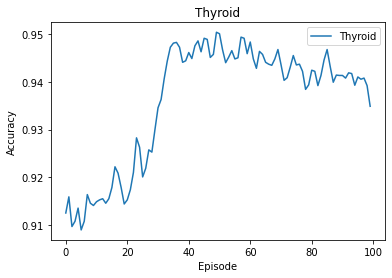

In [23]:
experiment(n_rep, d, Ws = np.arange(0,1,0.01))

# Audiology (Standardized) Data Set

In [24]:
df = data.load_audiology()

In [25]:
name_test = 'audiology'

In [26]:
dfs = {'audiology':df}

In [27]:
d = pd.DataFrame({'tests': [name_test], 'class': ['Class'], 'pos': ['cochlear_poss_noise']})

Running the test takes 8.672908234596253 minutes


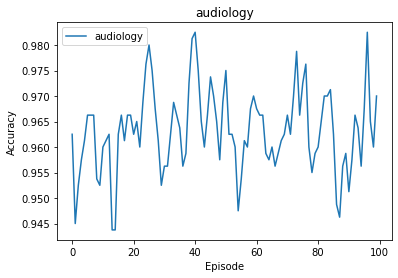

In [28]:
experiment(n_rep, d)

# Las Vegas Hotels

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv', sep = ';')

In [6]:
class_feat = 'Score'
pos_class = 5
name = 'Las Vegas clubs'
dfs = {'Las Vegas clubs': df}

In [7]:
d = pd.DataFrame({'tests': [name], 'class': [class_feat], 'pos': [pos_class]})

Running the test takes 3.7623926639556884 minutes


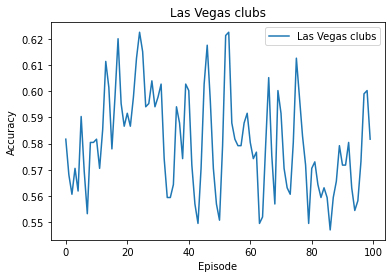

In [10]:
experiment(n_rep, d)

#  	Higher Education Students Performance Evaluation Dataset

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv', sep = ';')

In [ ]:
class_feat = 'GRADE'
pos_class = 1
name = 'students performance'
dfs = {'students performance':df}

In [ ]:
d = pd.DataFrame({'tests': [name], 'class': [class_feat], 'pos': [pos_class]})

In [ ]:
experiment(n_rep, d)